## Neurons and the Layers

Exploring the inner workings of neurons/units and layers by drawing Neural Networks parallel to the linear and logistic model. Also, exploring the tensorflow framework to visualize how these models are implemented in tensorflow framework.

## Intro to tensorflow

Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework that creates a simple, layer-centric interface to Tensorflow

In [20]:
%pip install tensorflow


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/332.0 MB 12.8 MB/s eta 0:00:26
    --------------------------------------- 4.7/332.0 MB 12.2 MB/s eta 0:00:27
    --------------------------------------- 7.9/332.0 MB 12.8 MB/s eta 0:00:26
   - -------------------------------------- 11.3/332.0 MB 13.7 MB/s eta 0:00:24
   - -------------------------------------- 14.7/332.0 MB 14.0 MB/s eta 0:00:23
   -- ------------------------------------- 18.1/332.0 MB 14.3 MB/s eta 0:00:23
   -- ------------------------------------- 20.7/332.0 MB 14.2 MB/s eta 0:00:22
   -- ------------------------------------- 23.6/332.0 MB 14.1 MB/s eta 0:00:22
   --- ------------------------------------ 26.5/332.0 MB 14.1 MB/s eta 0:00:22
   --- ------------------------------------ 29.4/332.0 MB 14.0 MB/s eta 0:00:22
   --- ------------------------------------ 32.0/332.0 MB 14.0 MB/s eta 0:00:22
   ---- ----------------------------------- 35.1/33

In [35]:
# Importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
from lab_utils_common import dlc

## Neuron without activation - Regression/Linear Model

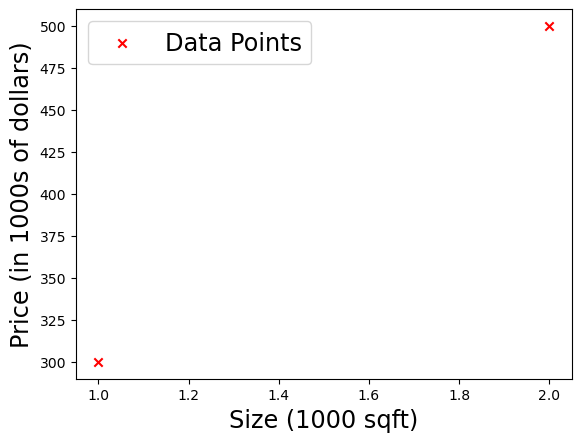

In [22]:
# Creating the dataset for house price prediction
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

## Regression/Linear Model

The function implemented by a neuron with no activation is the same as linear regression, We will define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [23]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

In [24]:
# Examine the weights
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in X_train. This will trigger the instantiation of the weights. The input to the layer must be 2-D, so we'll reshape it.

In [25]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[1.5036782]], shape=(1, 1), dtype=float32)


The result is a tensor (another name for an array) with a shape of (1,1) or one entry. Now let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [26]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[1.5036782]], b=[0.]


A linear regression model with a single input feature will have a single weight and bias. This matches the dimensions of our linear_layer above. The weights are initialized to random values so let's set them to some known values.

In [27]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [28]:
# Comparing the layers output to that of regression model
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


They produce the same values! Now, we can use our linear layer to make predictions on our training data.

In [29]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

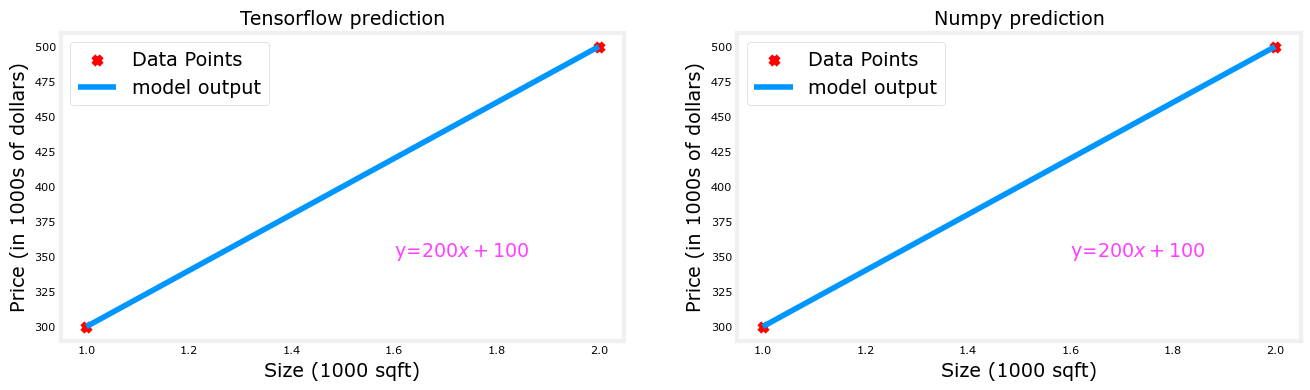

In [32]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

## Neuron with Sigmoid activation

The function implemented by a neuron/unit with a sigmoid activation is the same as logistic regression, Let's set w and b to some known values and check the model.

In [33]:
# Creating the dataset for binary classification
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

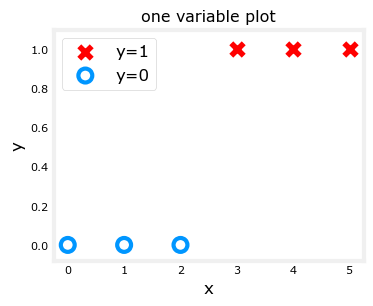

In [36]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

## Logistic Neuron

We can implement a 'logistic neuron' by adding a sigmoid activation. This will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [37]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

C:\Users\sufiy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model.summary() shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, w and b.

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-1.21]] [0.]
(1, 1) (1,)


In [40]:
# Set the weight and biases to known values
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [41]:
# Comparing the layers output to that of logistic regression model
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
[[0.01]]
[[0.01]]


They produce the same values! Now, we can use our logistic layer and NumPy model to make predictions on our training data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━

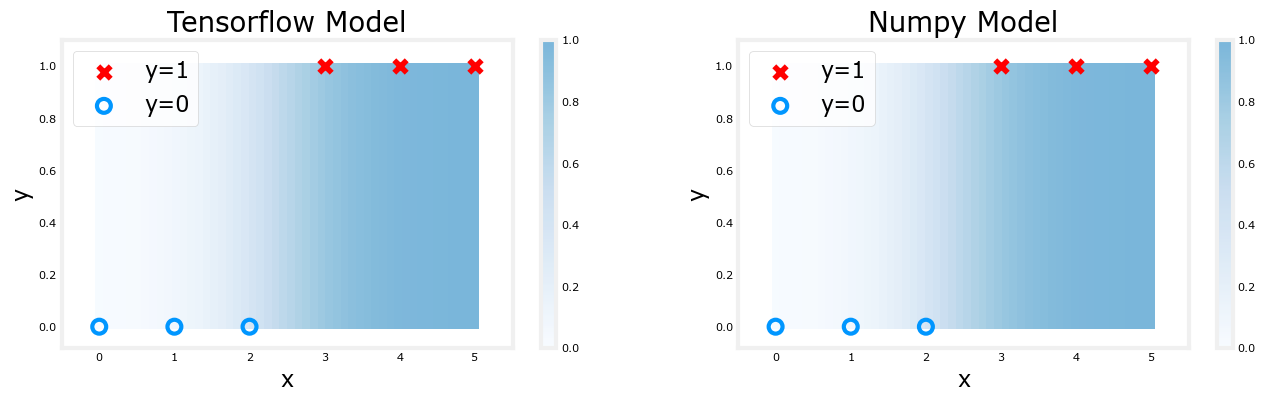

In [42]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

The shading above reflects the output of the sigmoid which varies from 0 to 1.

End Conclusion : Built a very simple neural network and have explored the similarities of a neuron to the linear and logistic regression.